In [1]:
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import List
import os 
import numpy as np 

In [2]:
def compute_rouge_l(candidate, reference):
    m, n = len(candidate), len(reference)
    #print(m,n)
    dp_table = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if candidate[i - 1] == reference[j - 1]:
                dp_table[i][j] = dp_table[i - 1][j - 1] + 1
            else:
                dp_table[i][j] = max(dp_table[i - 1][j], dp_table[i][j - 1])
    
    return dp_table[m][n] / n

In [3]:
csv_files = [f"ft-flare-rag-{count * 10}.csv" for count in range(1,6)]


In [12]:
# Create an empty list to store DataFrames
dfs = []

# Loop through each CSV file
for csv_file in csv_files:
    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Fill null values with 'None'
    df = df.fillna('None')
    
    # Append the DataFrame to the list
    dfs.append(df)

In [4]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return filtered_tokens


In [7]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    return tokens

In [8]:
def compute_similarity_score(answer,syntheses):
    tokens_answer = preprocess_text(answer)
    tokens_syntheses = preprocess_text(syntheses)
    str_answer = ' '.join(tokens_answer)
    str_syntheses = ' '.join(tokens_syntheses)
    freqdist_answer = nltk.FreqDist(str_answer.split())
    freqdist_syntheses = nltk.FreqDist(str_syntheses.split())
    # Extract frequencies for unique tokens in both texts
    unique_tokens = set(freqdist_answer.keys()).union(freqdist_syntheses.keys())

    freq_answer = [freqdist_answer[token] for token in unique_tokens]
    freq_syntheses = [freqdist_syntheses[token] for token in unique_tokens]

    vector_answer = np.array(freq_answer).reshape(1, -1)
    vector_syntheses = np.array(freq_syntheses).reshape(1, -1)

    similarity_score = cosine_similarity(vector_answer, vector_syntheses)[0][0]

    return similarity_score

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [14]:

total_average_rouge_l_scores = []
total_average_cosine_similarity_scores  = []

num_labels = []
count = 0 
for df in dfs:

    count += 10
    num_labels.append(count)

   #df = pd.read_csv(csv_file)
    rouge_l_scores = [] 
    cosine_similarity_scores = [] 

    for idx, row in df.iterrows():
        answer = row['answer']
        syntheses = row['syntheses'] 
        print(answer,syntheses)


    
        compute_sim_score = compute_similarity_score(answer,syntheses)
        cosine_similarity_scores.append(compute_sim_score)



        
        rouge_l_score = compute_rouge_l(answer, syntheses)
        rouge_l_scores.append(rouge_l_score)
       

    total_average_cosine_similarity_score = sum(cosine_similarity_scores) / len(cosine_similarity_scores)
    total_average_cosine_similarity_scores.append(total_average_cosine_similarity_score)


    total_average_rouge_l_score = sum(rouge_l_scores)/len(rouge_l_scores)
    total_average_rouge_l_scores.append(total_average_rouge_l_score)

$1577.00 The FY2018 capital expenditure amount for 3M was $1,501 million. This can be found in the Consolidated Statement of Cash Flows under the Cash Flows from Investing Activities section, specifically under the line item "Purchases of property, plant and equipment (PP&E)." 
$8.70 The year end FY2018 net PPNE for 3M was $8.738 billion USD.  This information can be found on the balance sheet under the "Property, Plant and Equipment" section. 
No, the company is managing its CAPEX and Fixed Assets pretty efficiently, which is evident from below key metrics:
CAPEX/Revenue Ratio: 5.1%
Fixed assets/Total Assets: 20%
Return on Assets= 12.4% Yes, based on the data provided, it appears that 3M is a capital-intensive business as they have a significant amount of property, plant, and equipment and invest a large amount in purchasing additional assets each year. This is also supported by the fact that they have consistently increased their dividend for 65 consecutive years, indicating a stable

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


Text(0.5, 1.0, ' After Fine-Tuning Cosine Similarity Score')

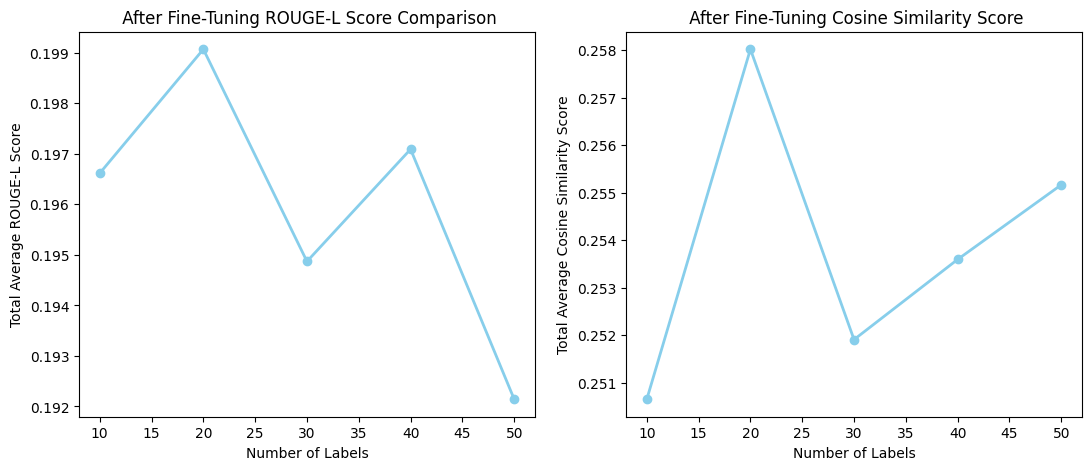

In [16]:
plt.figure(figsize=(20, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(num_labels, total_average_rouge_l_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)

plt.xlabel('Number of Labels')
plt.ylabel('Total Average ROUGE-L Score')
plt.title(' After Fine-Tuning ROUGE-L Score Comparison')

plt.subplot(1, 3, 2)
plt.plot(num_labels, total_average_cosine_similarity_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.xlabel('Number of Labels')
plt.ylabel('Total Average Cosine Similarity Score')
plt.title(' After Fine-Tuning Cosine Similarity Score')
